10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

In [4]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm



(a) Generate a data set with p = 20 features, n = 1,000 observa- tions, and an associated quantitative response vector generated according to the model
Y =Xβ+ε,
where β has some elements that are exactly equal to zero.

In [2]:
# Setting random seed for reproducibility
np.random.seed(42)

# Number of observations and features
n = 1000
p = 20

# Generate feature matrix X
X = np.random.randn(n, p)

# Generate coefficient vector beta
# Only 10 out of 20 features are influential
beta = np.array([np.random.randn() if i < 10 else 0 for i in range(p)])

# Generate error term epsilon
epsilon = np.random.randn(n)

# Calculate response vector Y
Y = X.dot(beta) + epsilon


(b) Split your dataset into a training set containing 100 observations and a test set containing 900 observations.

In [3]:
# Splitting data into training and test sets
X_train = X[:100]
Y_train = Y[:100]

X_test = X[100:]
Y_test = Y[100:]


(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [9]:
import statsmodels.api as sm

def forward_selection(X, y):
    remaining_features = list(range(X.shape[1]))
    current_features = []
    best_mse = float('inf')
    prev_mse = float('inf')
    
    while remaining_features:
        new_mse = []
        
        for feature in remaining_features:
            fitted = sm.OLS(y, sm.add_constant(X[:, current_features + [feature]])).fit()
            mse = fitted.mse_resid
            new_mse.append((mse, feature))

        new_mse.sort()
        best_mse, best_feature = new_mse[0]
        
        # Break the loop if MSE does not improve
        if current_features and best_mse >= prev_mse:
            break
        
        # Otherwise, update the features and continue
        remaining_features.remove(best_feature)
        current_features.append(best_feature)
        prev_mse = best_mse
        
    return current_features

selected_features = forward_selection(X_train, Y_train)

print("Selected features:", selected_features)


Selected features: [9, 6, 4, 7, 2, 5, 3, 1, 0, 8, 15, 10, 19, 14]


(d) Plot the test set MSE associated with the best model of each size.

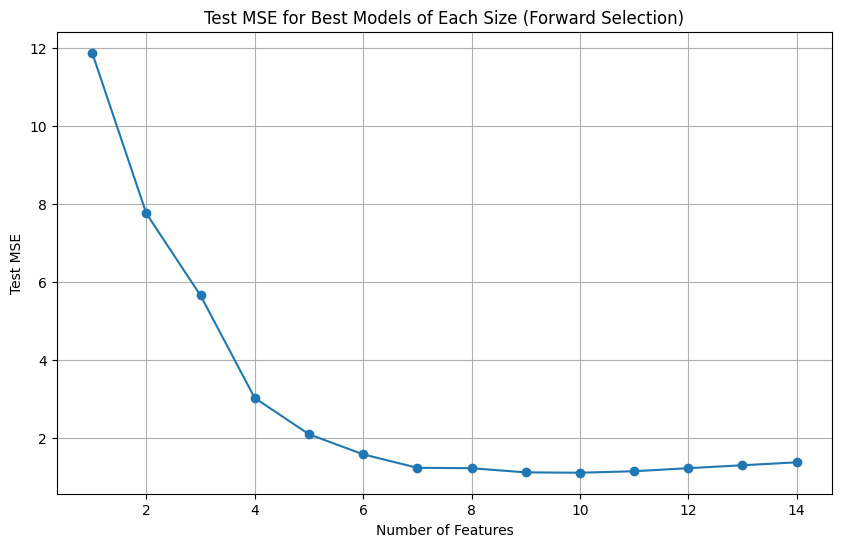

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def calculate_mse(model_features, X_train, Y_train, X_test, Y_test):
    model = sm.OLS(Y_train, sm.add_constant(X_train[:, model_features])).fit()
    predictions = model.predict(sm.add_constant(X_test[:, model_features]))
    mse = ((predictions - Y_test)**2).mean()
    return mse

# Calculate test MSE for best models of each size
test_mse_values = []
num_features = len(selected_features)
for i in range(1, num_features + 1):
    mse = calculate_mse(selected_features[:i], X_train, Y_train, X_test, Y_test)
    test_mse_values.append(mse)

# Plot the test MSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_features + 1), test_mse_values, '-o')
plt.xlabel('Number of Features')
plt.ylabel('Test MSE')
plt.title('Test MSE for Best Models of Each Size (Forward Selection)')
plt.grid(True)
plt.show()


(e) For which model size does the test set MSE take on its minimum value? Comment on your results. 

If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

The test set MSE is minimized for a model with 10 features.
Minimum Test MSE: 1.1089840659930155


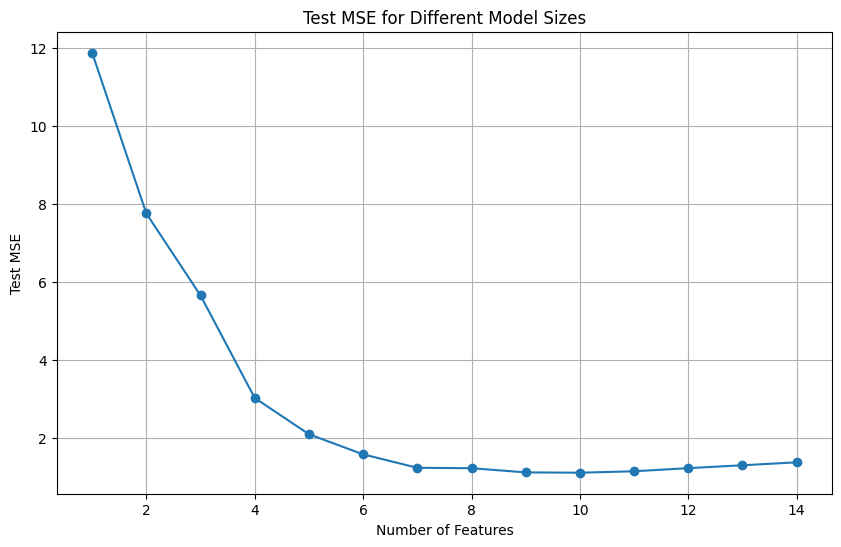

In [11]:
def calculate_mse(features, X_train, Y_train, X_test, Y_test):
    model = sm.OLS(Y_train, sm.add_constant(X_train[:, features])).fit()
    predictions = model.predict(sm.add_constant(X_test[:, features]))
    mse = ((predictions - Y_test)**2).mean()
    return mse

# Compute the test set MSE for each model size
mse_values = [calculate_mse(selected_features[:i+1], X_train, Y_train, X_test, Y_test) for i in range(len(selected_features))]

# Identify the model size with the minimum test MSE
min_mse_value = min(mse_values)
min_mse_model_size = mse_values.index(min_mse_value) + 1  # Adding 1 because list indices start at 0

print(f"The test set MSE is minimized for a model with {min_mse_model_size} features.")
print(f"Minimum Test MSE: {min_mse_value}")

# Plot the test MSE values for visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selected_features) + 1), mse_values, '-o')
plt.xlabel('Number of Features')
plt.ylabel('Test MSE')
plt.title('Test MSE for Different Model Sizes')
plt.grid(True)
plt.show()


(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? 

(g) Create a plot displaying pj=1(βj − βˆjr)2 for a range of values of r, where βˆjr is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?


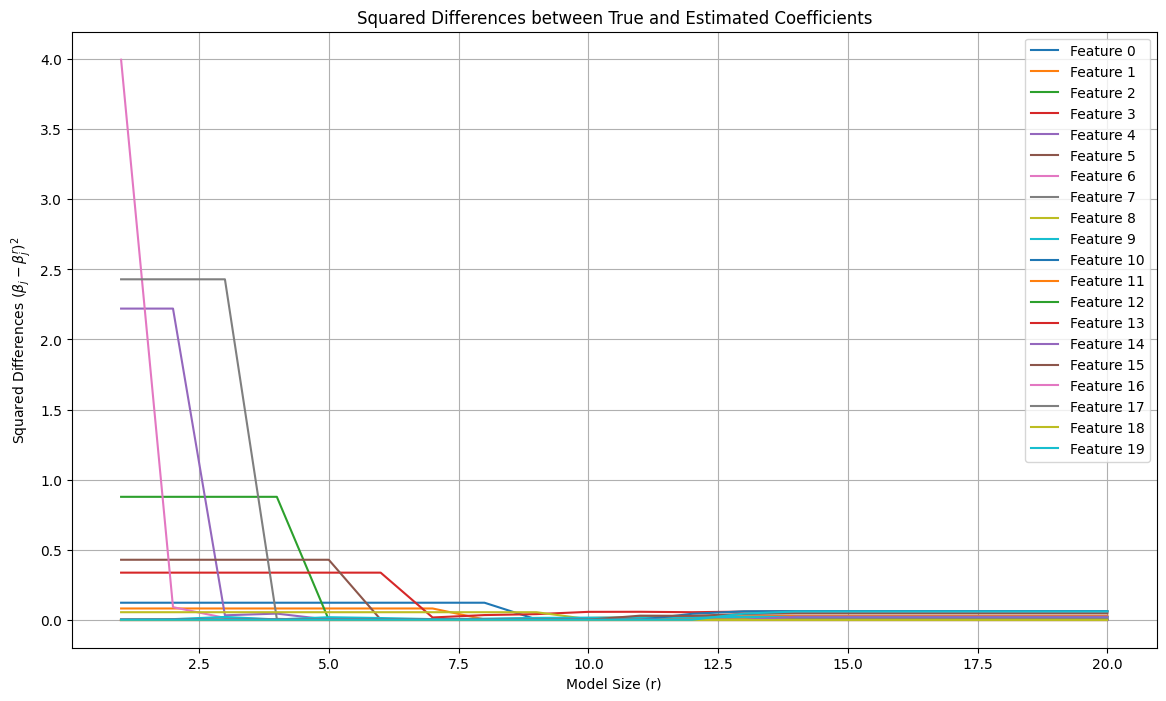

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize a matrix to store squared differences for all coefficients across all model sizes
squared_diffs = np.zeros((X_train.shape[1], X_train.shape[1]))

# For each model size r, compute the squared differences
for r in range(1, X_train.shape[1] + 1):
    # Fit the model for the best r features
    model_r = sm.OLS(Y_train, sm.add_constant(X_train[:, selected_features[:r]])).fit()
    estimated_coeffs = np.zeros(X_train.shape[1])
    estimated_coeffs[selected_features[:r]] = model_r.params[1:]  # Exclude the intercept
    
    # Compute the squared differences
    diffs = (beta - estimated_coeffs) ** 2
    squared_diffs[r-1, :] = diffs

# Plot
plt.figure(figsize=(14, 8))
for j in range(X_train.shape[1]):
    plt.plot(range(1, X_train.shape[1] + 1), squared_diffs[:, j], label=f'Feature {j}')

plt.xlabel('Model Size (r)')
plt.ylabel('Squared Differences $(β_j - β_j^r)^2$')
plt.title('Squared Differences between True and Estimated Coefficients')
plt.legend()
plt.grid(True)
plt.show()


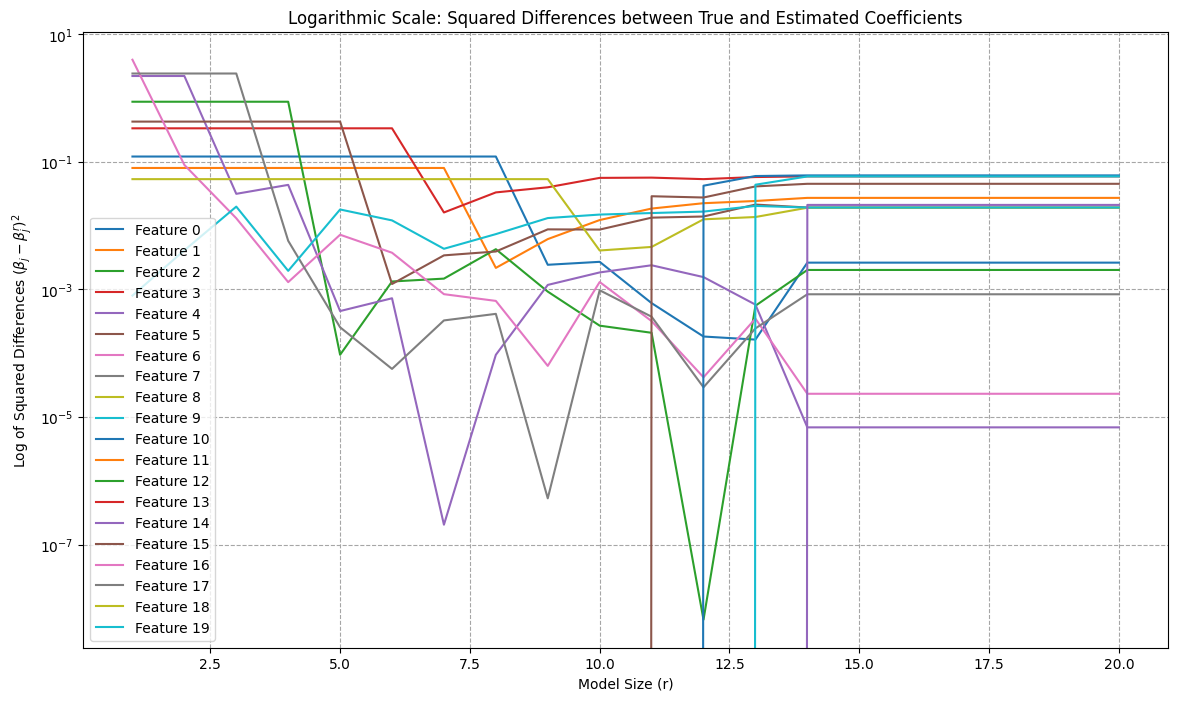

In [13]:
plt.figure(figsize=(14, 8))
for j in range(X_train.shape[1]):
    plt.plot(range(1, X_train.shape[1] + 1), squared_diffs[:, j], label=f'Feature {j}')

plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xlabel('Model Size (r)')
plt.ylabel('Log of Squared Differences $(β_j - β_j^r)^2$')
plt.title('Logarithmic Scale: Squared Differences between True and Estimated Coefficients')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')  # Grid for logarithmic scale
plt.show()
